In [4]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(r'C:\Users\tiago\Desktop\TIAGO\PYTHON\Epicode\owid-covid-data.csv')

In [8]:
# Verifica delle dimensioni del dataset
print(df.shape)

(402794, 67)


In [9]:
# Visualizzazione dei metadati (informazioni sulle colonne)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402794 entries, 0 to 402793
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402794 non-null  object 
 1   continent                                   383500 non-null  object 
 2   location                                    402794 non-null  object 
 3   date                                        402794 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [8]:
# Rimuovere locazioni senza continente
df_continent = df.dropna(subset=['continent'])

In [9]:
# Calcolo del numero totale di casi per continente
continent_cases = df_continent.groupby('continent')['total_cases'].sum()
print(continent_cases)

continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64


In [12]:
def compare_continents(continent1, continent2):
    data = df_continent[df_continent['continent'].isin([continent1, continent2])]
    grouped = data.groupby('continent')['total_cases']

    # Calcolo delle statistiche richieste
    max_cases = grouped.max()
    mean_cases = grouped.mean()
    total_world_cases = df['total_cases'].sum()
    percent_world_cases = grouped.sum() / total_world_cases * 100

    return max_cases, mean_cases, percent_world_cases

continent1 = 'Oceania'
continent2 = 'Africa'
max_cases, mean_cases, percent_world_cases = compare_continents(continent1, continent2)
print(f"Max cases:\n{max_cases}\n")
print(f"Mean cases:\n{mean_cases}\n")
print(f"Percentage of world cases:\n{percent_world_cases}\n")

Max cases:
continent
Africa      4072697.0
Oceania    11861161.0
Name: total_cases, dtype: float64

Mean cases:
continent
Africa     158524.775754
Oceania    379528.466206
Name: total_cases, dtype: float64

Percentage of world cases:
continent
Africa     0.489366
Oceania    0.375696
Name: total_cases, dtype: float64



In [10]:
def compare_continents(df_continent, continent1, continent2, continent3, continent4, continent5):
    data = df_continent[df_continent['continent'].isin([continent1, continent2, continent3, continent4, continent5])]
    grouped = data.groupby('continent')['total_cases']

    # Calcolo delle statistiche richieste
    max_cases = grouped.max()
    mean_cases = grouped.mean()
    total_world_cases = df['total_cases'].sum()
    percent_world_cases = grouped.sum() / total_world_cases * 100

    return max_cases, mean_cases, percent_world_cases

continent1 = 'Oceania'
continent2 = 'Africa'
continent3 = 'Asia'
continent4 = 'Europe'
continent5 = 'North America'
continent6 = 'South America'

max_cases, mean_cases, percent_world_cases = compare_continents(df_continent, continent1, continent2, continent3, continent4, continent5)
print(f"Max cases:\n{max_cases}\n")
print(f"Mean cases:\n{mean_cases}\n")
print(f"Percentage of world cases:\n{percent_world_cases}\n")


"""Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10"""


Max cases:
continent
Africa             4072697.0
Asia              99357895.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
Name: total_cases, dtype: float64

Mean cases:
continent
Africa           1.585248e+05
Asia             3.327540e+06
Europe           2.762451e+06
North America    1.879169e+06
Oceania          3.795285e+05
Name: total_cases, dtype: float64

Percentage of world cases:
continent
Africa           0.489366
Asia             8.235554
Europe           7.816228
North America    4.227136
Oceania          0.375696
Name: total_cases, dtype: float64



'Africa           1.360475e+10\nAsia             2.289547e+11\nEurope           2.172971e+11\nNorth America    1.175176e+11\nOceania          1.044462e+10\nSouth America    6.819703e+10'

In [12]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


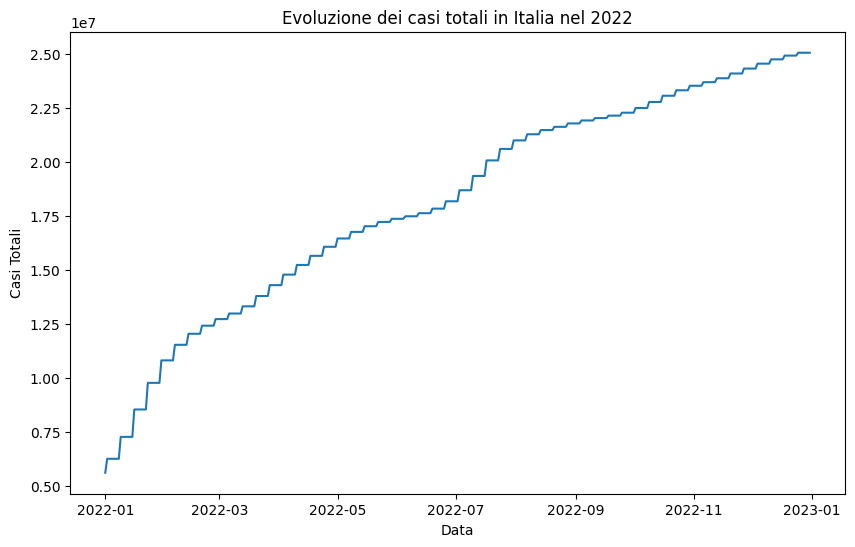

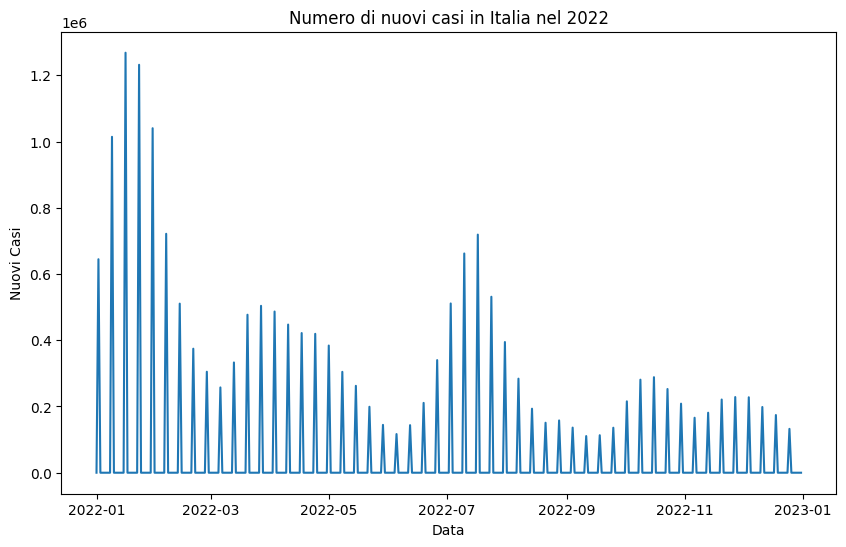

C:\Users\tiago\AppData\Local\Temp\ipykernel_22048\3214464814.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()


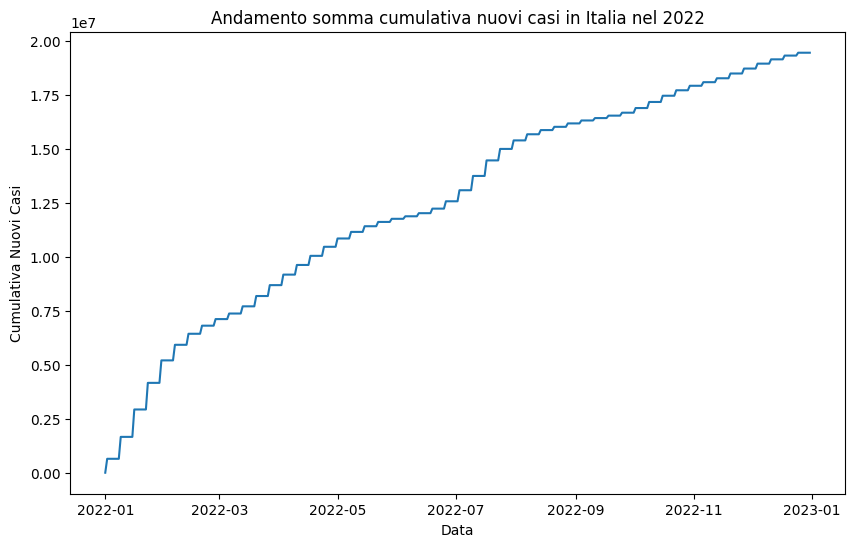

In [13]:
import matplotlib.pyplot as plt

# Filtrare i dati per l'Italia nel 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Evoluzione dei casi totali rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_italy_2022['date']), df_italy_2022['total_cases'])
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.show()

# Numero di nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_italy_2022['date']), df_italy_2022['new_cases'])
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.show()

# Somma cumulativa nuovi casi del 2022
df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_italy_2022['date']), df_italy_2022['cumulative_new_cases'])
plt.title('Andamento somma cumulativa nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Cumulativa Nuovi Casi')
plt.show()



L'andamento della somma cumulativa dei nuovi casi nel 2022 fornisce una panoramica sull'incremento totale dei casi nel corso dell'anno.
Mostra una tendenza simile all'andamento dei casi totali, questo perchè vi è una correlazione tra l'incremento giornaliero dei casi e l'andamento complessivo nel tempo.
Questa analisi è particolarmente significativa per l'Italia, in quanto può evidenziare l'efficacia delle misure di controllo adottate nel gestire la diffusione del virus nel corso dell'anno.

In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.8 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00


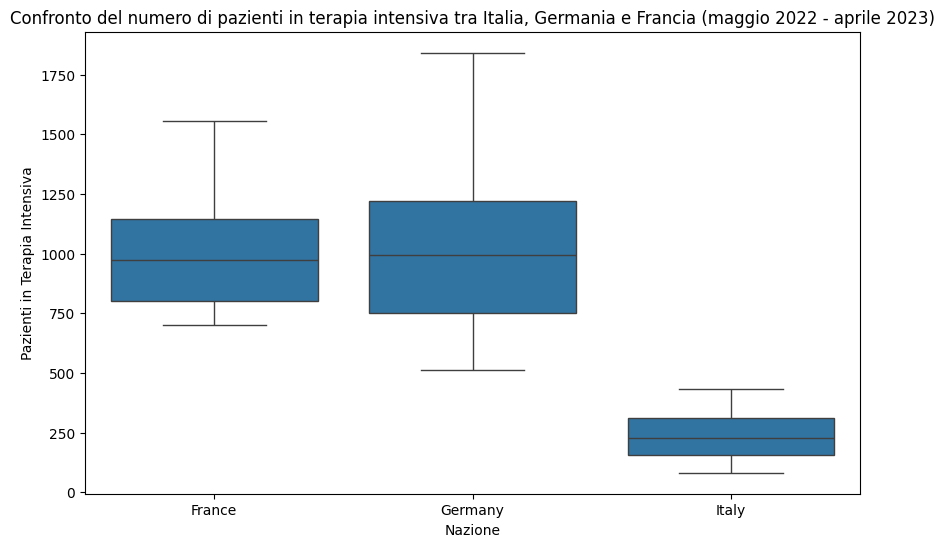

In [14]:
# Filtrare i dati da maggio 2022 ad aprile 2023
df_icus = df[(df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30') & 
             (df['location'].isin(['Italy', 'Germany', 'France']))]

# Boxplot del numero di pazienti in terapia intensiva
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_icus)
plt.title('Confronto del numero di pazienti in terapia intensiva tra Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()


In [21]:
# Filtrare i dati per il 2023 e le nazioni specificate
df_hospital = df[(df['date'].str.startswith('2021')) & 
                 (df['iso_code'].isin(['ITA', 'DEU', 'FRA', 'ESP']))]

# Gestione dei dati null (se necessario)
df_hospital['hosp_patients'] = df_hospital['hosp_patients'].fillna(0)

# Somma dei pazienti ospedalizzati per nazione
hospitalized_sum = df_hospital.groupby('iso_code')['hosp_patients'].sum()
print(hospitalized_sum)

iso_code
DEU          0.0
ESP    2411706.0
FRA    6008717.0
ITA    4419950.0
Name: hosp_patients, dtype: float64


C:\Users\tiago\AppData\Local\Temp\ipykernel_22048\3488206030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital['hosp_patients'] = df_hospital['hosp_patients'].fillna(0)


La presenza del dato nullo per la Germania è spiegato dall’assenza dell’informazione sul DataSet analizzato.
Una possibile soluzione potrebbe essere integrare al DataSet estratto un ulteriore DataBase esterno, con la difficoltà di legare le informazioni provenienti da fonti diverse 